# Data 200 Project - Mental health dataset EDA

In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

## Part 1: EDA in nchs_covid_health_insurance_coverage.csv

In [2]:
covid_data3 = pd.read_csv('../data/nchs_covid_health_insurance_coverage.csv')
covid_data3.head(3)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Uninsured at the Time of Interview,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,12.6,12.1,13.3,12.1 - 13.3,NaN,NaN
1,Uninsured at the Time of Interview,By Age,United States,18 - 24 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,17.7,14.2,21.6,14.2 - 21.6,NaN,NaN
2,Uninsured at the Time of Interview,By Age,United States,25 - 34 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,16.8,15.6,18.1,15.6 - 18.1,NaN,NaN


In [3]:
e = covid_data3[covid_data3['Group']=='By Education']
e.head(3)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
12,Uninsured at the Time of Interview,By Education,United States,Less than a high school diploma,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.6,20.2,27.3,20.2 - 27.3,NaN,NaN
13,Uninsured at the Time of Interview,By Education,United States,High school diploma or GED,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,18.8,17.4,20.4,17.4 - 20.4,NaN,NaN
14,Uninsured at the Time of Interview,By Education,United States,Some college/Associate's degree,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,12.2,11.3,13.2,11.3 - 13.2,NaN,NaN


In [4]:
#pivot table with adding all values(percentage) in all time periods
is4 = e.pivot_table(index = "Indicator", columns = "Subgroup", values = "Value", aggfunc = np.sum).reset_index()
is4

Subgroup,Indicator,Bachelor's degree or higher,High school diploma or GED,Less than a high school diploma,Some college/Associate's degree
0,Private Health Insurance Coverage,3922.9,2821.0,2035.9,3238.7
1,Public Health Insurance Coverage,466.4,1260.8,1602.8,1056.8
2,Uninsured at the Time of Interview,190.5,740.6,1224.3,491.1


In [5]:
is1 = e.pivot_table(index = "Subgroup", columns = "Indicator", values = "Value", aggfunc = np.sum).reset_index()
is1['total'] = is1['Private Health Insurance Coverage']+is1['Public Health Insurance Coverage']+is1['Uninsured at the Time of Interview']
is1

Indicator,Subgroup,Private Health Insurance Coverage,Public Health Insurance Coverage,Uninsured at the Time of Interview,total
0,Bachelor's degree or higher,3922.9,466.4,190.5,4579.8
1,High school diploma or GED,2821.0,1260.8,740.6,4822.4
2,Less than a high school diploma,2035.9,1602.8,1224.3,4863.0
3,Some college/Associate's degree,3238.7,1056.8,491.1,4786.6


In [6]:
#get the percent of insurance coverage types
is2 = is1[['Subgroup']]
is2['Percent of Private Health Insurance Coverage'] = is1['Private Health Insurance Coverage']/is1['total']
is2['Percent of Public Health Insurance Coverage'] = is1['Public Health Insurance Coverage']/is1['total']
is2['Percent of Uninsured at the Time of Interview'] = is1['Uninsured at the Time of Interview']/is1['total']
is2

Indicator,Subgroup,Percent of Private Health Insurance Coverage,Percent of Public Health Insurance Coverage,Percent of Uninsured at the Time of Interview
0,Bachelor's degree or higher,0.856566,0.101839,0.041596
1,High school diploma or GED,0.584978,0.261447,0.153575
2,Less than a high school diploma,0.418651,0.329591,0.251758
3,Some college/Associate's degree,0.676618,0.220783,0.102599


In [7]:
is2.set_index(['Subgroup'])

Indicator,Percent of Private Health Insurance Coverage,Percent of Public Health Insurance Coverage,Percent of Uninsured at the Time of Interview
Subgroup,,,
Bachelor's degree or higher,0.856566,0.101839,0.041596
High school diploma or GED,0.584978,0.261447,0.153575
Less than a high school diploma,0.418651,0.329591,0.251758
Some college/Associate's degree,0.676618,0.220783,0.102599


In [8]:
is3 = is2.set_index('Subgroup').transpose()
is3

Subgroup,Bachelor's degree or higher,High school diploma or GED,Less than a high school diploma,Some college/Associate's degree
Indicator,,,,
Percent of Private Health Insurance Coverage,0.856566,0.584978,0.418651,0.676618
Percent of Public Health Insurance Coverage,0.101839,0.261447,0.329591,0.220783
Percent of Uninsured at the Time of Interview,0.041596,0.153575,0.251758,0.102599


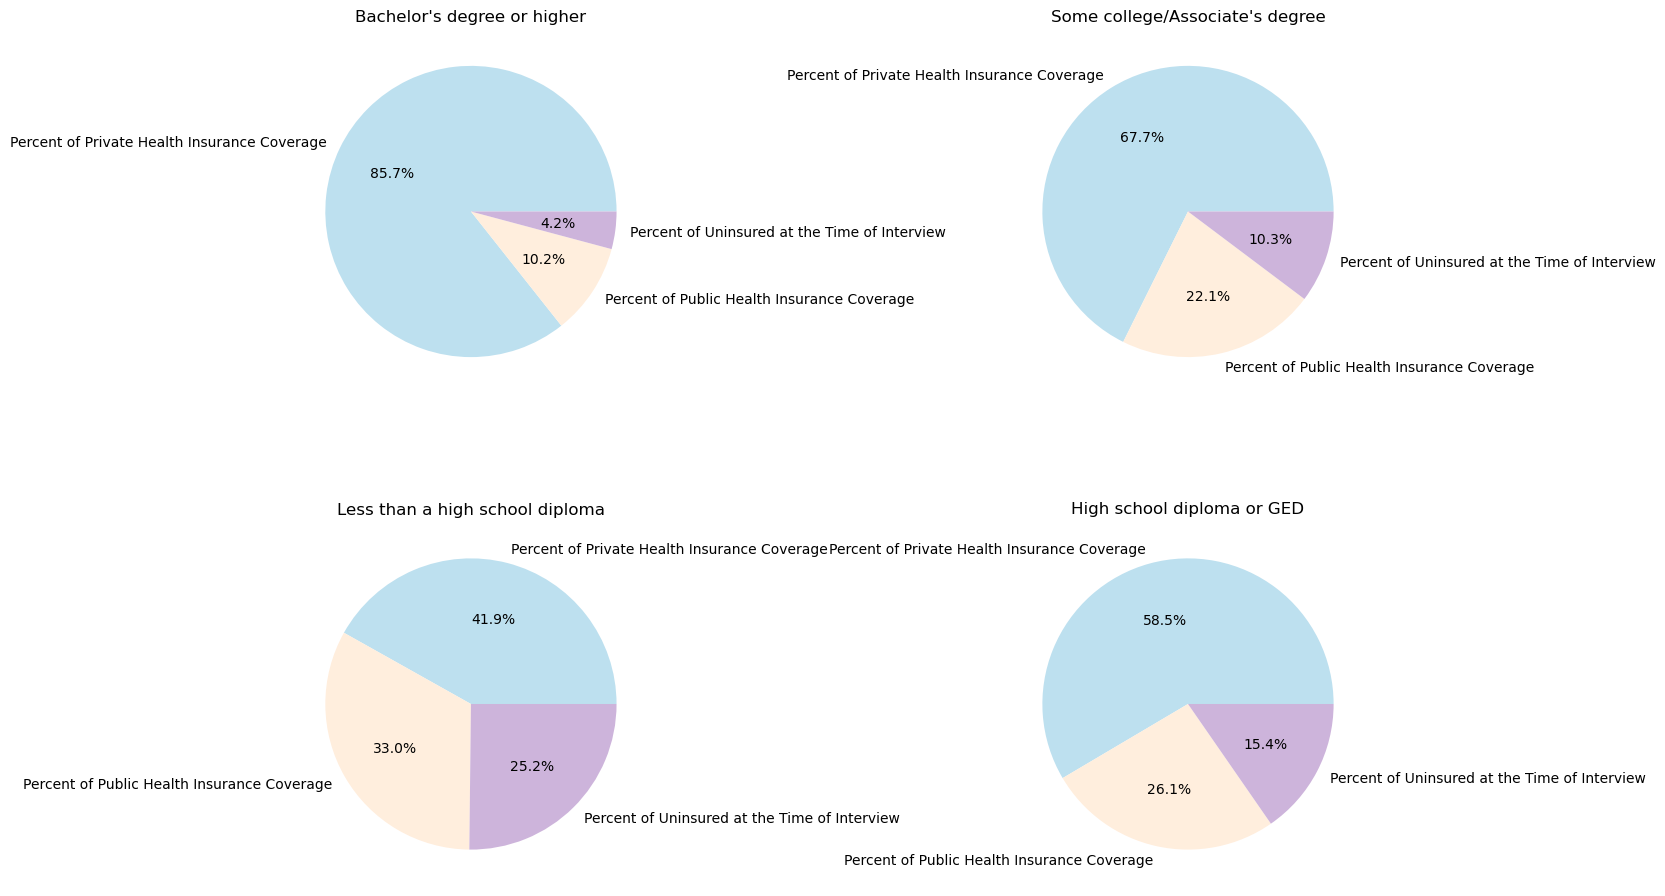

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("Bachelor's degree or higher")
plt.pie(is3["Bachelor's degree or higher"], labels = ["Percent of Private Health Insurance Coverage","Percent of Public Health Insurance Coverage","Percent of Uninsured at the Time of Interview"], colors = ['#BDE0EF','#FFEEDD','#CDB4DB'], autopct='%1.1f%%')
plt.subplot(222)
plt.title("Some college/Associate's degree")
plt.pie(is3["Some college/Associate's degree"], labels = ["Percent of Private Health Insurance Coverage","Percent of Public Health Insurance Coverage","Percent of Uninsured at the Time of Interview"], colors = ['#BDE0EF','#FFEEDD','#CDB4DB'], autopct='%1.1f%%')
plt.subplot(224)
plt.title("High school diploma or GED")
plt.pie(is3['High school diploma or GED'], labels = ["Percent of Private Health Insurance Coverage","Percent of Public Health Insurance Coverage","Percent of Uninsured at the Time of Interview"], colors = ['#BDE0EF','#FFEEDD','#CDB4DB'], autopct='%1.1f%%')
plt.subplot(223)
plt.title("Less than a high school diploma")
plt.pie(is3['Less than a high school diploma'], labels = ["Percent of Private Health Insurance Coverage","Percent of Public Health Insurance Coverage","Percent of Uninsured at the Time of Interview"], colors = ['#BDE0EF','#FFEEDD','#CDB4DB'], autopct='%1.1f%%')
plt.tight_layout()

## Part 2: EDA in nchs_covid_indicators_of_anxiety_depression.csv

In [10]:
covid_data1 = pd.read_csv('../data/nchs_covid_indicators_of_anxiety_depression.csv')
covid_data1.head(3)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN


In [11]:
#select the symptom as "Symptoms of Anxiety Disorder or Depressive Disorder"
b = covid_data1[(covid_data1['Group']=='By State')& (covid_data1['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder')]
b.head(3)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
159,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alabama,Alabama,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,30.3,24.8,36.2,24.8 - 36.2,25.6 - 33.3
160,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alaska,Alaska,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,31.5,28.8,34.4,28.8 - 34.4,25.6 - 33.3
161,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Arizona,Arizona,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,36.4,32.3,40.7,32.3 - 40.7,34.8 - 36.7


In [12]:
#get the mean reported mental issue rate for every state
state = b.groupby("State")[['Value']].mean()
state

,Value
State,
Alabama,35.902326
Alaska,35.567442
Arizona,36.511628
Arkansas,38.062791
California,37.669767
Colorado,35.090698
Connecticut,33.923256
Delaware,32.444186
District of Columbia,35.737209


In [13]:
state.mean()

Value    34.639945
dtype: float64

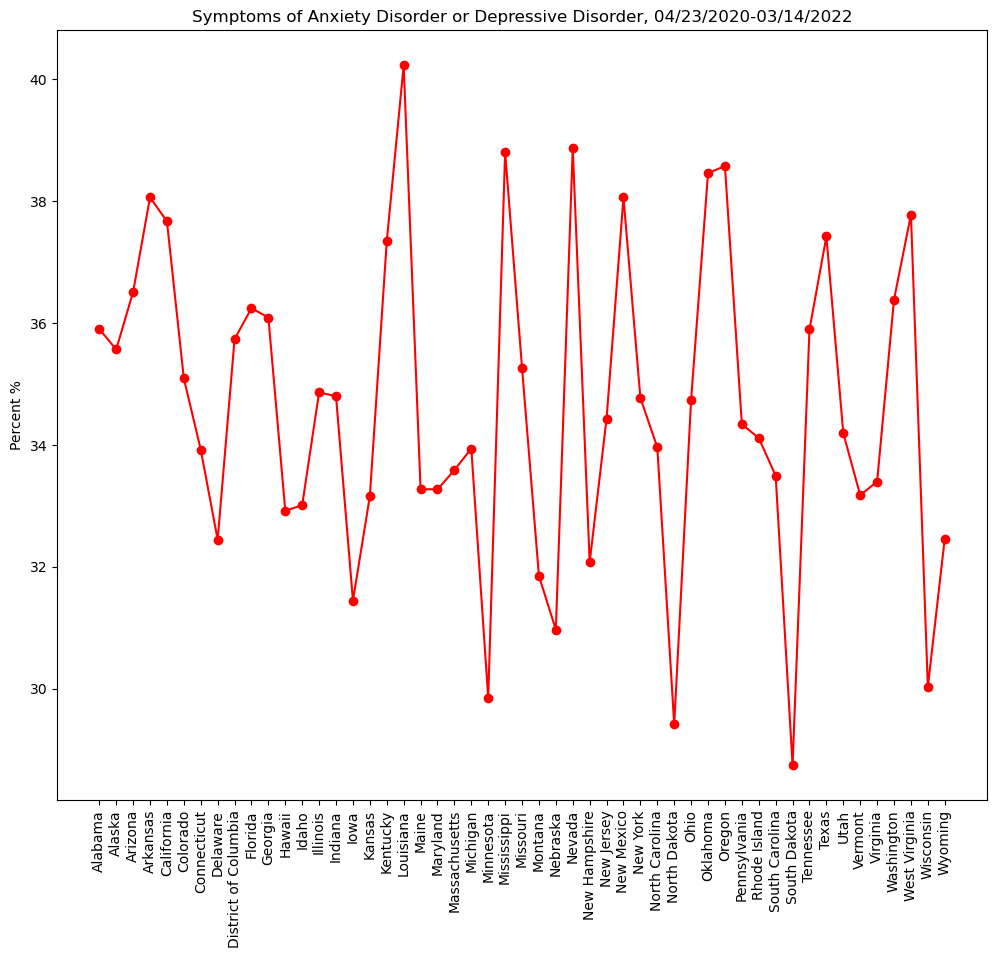

In [14]:
plt.figure(figsize=(12,10))
plt.plot(state['Value'], color='red', marker='o')
plt.title('Symptoms of Anxiety Disorder or Depressive Disorder, 04/23/2020-03/14/2022')
plt.xticks(rotation=90)
plt.ylabel('Percent %')
plt.show()

## Part 3: Reported mental health issue rate of every state in US
With symptoms of anxiety disorder or depressive disorder, from 04/23/2020-03/14/2022, changing index to everyday
using "nchs_covid_indicators_of_anxiety_depression.csv"

In [15]:
mt = b.reset_index()
mh = mt.drop(['index','Indicator','Group','Subgroup','Phase','Time Period','Low CI','High CI','Confidence Interval','Quartile Range'], axis=1)
mh.head(3)

,State,Time Period Label,Time Period Start Date,Time Period End Date,Value
0,Alabama,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,30.3
1,Alaska,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,31.5
2,Arizona,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,36.4


In [16]:
# Convert date to datetime
mh['Time Period Start Date'] = pd.to_datetime(mh['Time Period Start Date']) 
mh['Time Period End Date'] = pd.to_datetime(mh['Time Period End Date']) 

In [17]:
# Create an empty DataFrame with a date index for the new data 
start_date = mh['Time Period Start Date'].min() 
end_date = mh['Time Period End Date'].max() 
date_range = pd.date_range(start_date, end_date) 
mental_health = pd.DataFrame(index=date_range) 

In [18]:
# Fill the new DataFrame with the values for each state and each day
for index, row in mh.iterrows(): 
    state = row['State'] 
    value = row['Value'] 
    start = row['Time Period Start Date'] 
    end = row['Time Period End Date'] 
    mask = (mental_health.index >= start) & (mental_health.index <= end) 
    mental_health.loc[mask, state] = value 

In [19]:
mental_health.fillna(method='ffill', inplace=True) #fill in value which is not in the investigation time period

In [20]:
# Assuming new_df is the dataframe you provided
mental_health['median'] = mental_health.median(axis=1)
mental_health['average'] = mental_health.mean(axis=1)
mental_health['max'] = mental_health.max(axis=1)
mental_health['min'] = mental_health.min(axis=1)

In [21]:
mental_health.head(20)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,median,average,max,min
2020-04-23,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-04-24,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-04-25,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-04-26,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-04-27,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-04-28,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-04-29,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-04-30,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-05-01,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6
2020-05-02,30.3,31.5,36.4,38.0,37.4,35.9,40.2,34.7,37.6,36.8,...,33.9,33.7,35.0,34.3,31.1,31.0,34.7,34.567308,41.4,25.6


In [22]:
mental_health.columns.unique()

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'median', 'average', 'max',
       'min'],
      dtype='object')

In [23]:
mental_health.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,median,average,max,min
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,36.030535,35.857887,36.103907,38.039508,36.982634,34.769320,33.207525,32.017656,35.285528,35.255427,...,33.193632,32.924023,36.107236,37.433864,29.620116,32.789291,34.366281,34.342572,42.778871,25.616208
std,4.387149,4.360067,4.497036,4.201078,5.203966,5.240817,4.925953,4.649853,5.239905,4.608116,...,4.806932,4.252754,4.671595,4.747260,4.966192,4.811620,4.082448,4.019117,4.597459,3.480017
min,25.200000,26.900000,27.900000,26.400000,30.300000,27.900000,23.600000,24.300000,25.000000,26.600000,...,23.000000,25.800000,28.300000,30.700000,22.300000,22.000000,28.100000,28.917308,33.700000,19.900000
25%,33.600000,32.900000,32.600000,35.100000,32.000000,30.200000,28.900000,27.400000,31.100000,31.600000,...,29.900000,29.800000,32.700000,34.100000,26.000000,29.500000,31.300000,31.342308,38.800000,23.200000
50%,35.300000,35.600000,35.100000,38.200000,37.300000,33.200000,32.300000,32.100000,35.900000,34.700000,...,33.600000,32.300000,34.700000,37.000000,28.300000,32.400000,33.100000,32.867308,41.700000,24.800000
75%,38.500000,38.500000,39.800000,41.100000,42.100000,37.700000,37.500000,34.400000,38.100000,39.400000,...,36.100000,36.700000,40.100000,41.000000,33.300000,35.600000,38.000000,37.648077,46.800000,27.800000
max,44.800000,44.600000,44.900000,47.200000,46.100000,45.800000,41.800000,42.900000,50.100000,43.800000,...,44.000000,41.400000,46.300000,49.700000,40.000000,44.800000,41.600000,41.919231,52.300000,33.600000


In [24]:
#mental_health.to_csv('mental_health.csv', index=True)